In [1]:
'''Minimizer in Python''' ###import util you dumby
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
%matplotlib inline


from matplotlib import style


     4      3     2
1.5 x - 10 x - 5 x + 60 x + 50
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 14523.326758127116
            Iterations: 7
            Function evaluations: 69
            Gradient evaluations: 7
Fitted polynomial: 1.5493839607715185*x^4 + -9.665315628040663*x^3 + -6.436069970638969*x^2 + 53.58615561553044*x + 44.04241085952867


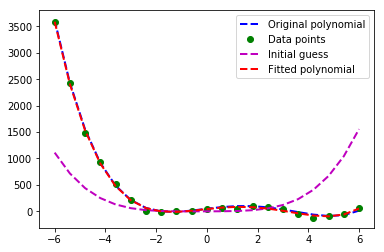

In [2]:
def error_poly(C, data):
    """Compute error between given polynomial and observed data.
    Parameters
    ----------
    C: numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x, y)
    Returns error as a single real value.
    """

    # Metric: Sum of squared Y-axis differences
    err = np.sum((data[:, 1] - np.polyval(C, data[:, 0])) ** 2)
    ##<add.this>(<1th index of array> - <polynomial_classpoly>(<poly1d object>, <0th index of array>)
    return err


def fit_poly(data, error_func, degree=4): #polyfit() https://www.youtube.com/watch?v=ro5ftxuD6is
    ##^^you can create a function using an array with polyfit ex: polyfit(x,y,1)(<array>,<array>,degree)
    """Fit a polynomial to given data, using supplied error function.
    Parameters
    ----------
    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed data
    Returns polynomial that minimizes the error function.
    """

    # Generate initial guess for polynomial model (all coeffs = 1)
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32)) ##polynomial with 1's as C0's 1 greater than degree
    ##<initial_guess = <1dpolynomial(<C0's ones>(<degree> + <1>, <dtype=np.float32))
    # Plot initial guess (optional)
    x = np.linspace(-6, 6, 21) #the x-increments of the plot
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label="Initial guess")
    # Call optimizer to minimize error function
    result = spo.minimize(error_poly, Cguess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x)  # convert optimal result into a poly1d obeject and return


def test_run():
    # Define original polynomial
    p = np.poly1d([1.5, -10, -5, 60, 50])
    Corig = np.poly1d(p)
    print(Corig)
    #print("Original polynomial: {}*x^4 + {}*x^3 + {}*x^2 + {}*x + {}".format(Corig[4], Corig[3], Corig[2], Corig[1], Corig[0]))
    Xorig = np.linspace(-6, 6, 21)
    Yorig = np.polyval(Corig, Xorig)
    plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original polynomial")

    # Generate noisy data points
    noise_sigma = 30.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T  # Convert the input to an array, then transpose
    plt.plot(data[:, 0], data[:, 1], 'go', label="Data points")

    # Try to fit a polynomial to this data
    Cfit = fit_poly(data, error_poly)
    print("Fitted polynomial: {}*x^4 + {}*x^3 + {}*x^2 + {}*x + {}".format(Cfit[4], Cfit[3], Cfit[2], Cfit[1], Cfit[0]))
    plt.plot(data[:, 0], np.polyval(Cfit, data[:, 0]), 'r--', linewidth=2.0, label="Fitted polynomial")

    # Add a legend and show plot
    plt.legend()
    plt.show()


if __name__ == "__main__":
    test_run()